In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os  
import glob
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

from lmfit import Model
from scipy.stats import kstest

In [2]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_a = 4.0
alpha_g = 2.0
dim = [1,2,3,4]
complexity_time_1d = []
complexity_time_2d = []
complexity_time_3d = []
complexity_time_4d = []

for i in N:
    for d in dim:
        path_all = f"../../data/N_{i}/dim_{d}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/time_process_seconds.txt"
    
        data = pd.read_csv(path_all)
        time_mean = data.mean().values[0]
        
        if(d == 1):
            complexity_time_1d.append(time_mean)
        elif(d == 2):
            complexity_time_2d.append(time_mean)
        elif(d == 3):
            complexity_time_3d.append(time_mean)
        elif(d == 4):
            complexity_time_4d.append(time_mean)

[[Model]]
    Model(time_theoric)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 338
    # data points      = 7
    # variables        = 2
    chi-square         = 123182.557
    reduced chi-square = 24636.5114
    Akaike info crit   = 72.4285881
    Bayesian info crit = 72.3204084
    R-squared          = 0.99972550
[[Variables]]
    q:  2.15941397 +/- 0.03984969 (1.85%) (init = 7.72e-08)
    b:  3.0415e-08 +/- 1.5323e-08 (50.38%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(q, b) = -0.9999
KS Statistic: 0.14285714285714285
P-value: 0.9999609537692629


/home/junior/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


<function matplotlib.pyplot.show(close=None, block=None)>

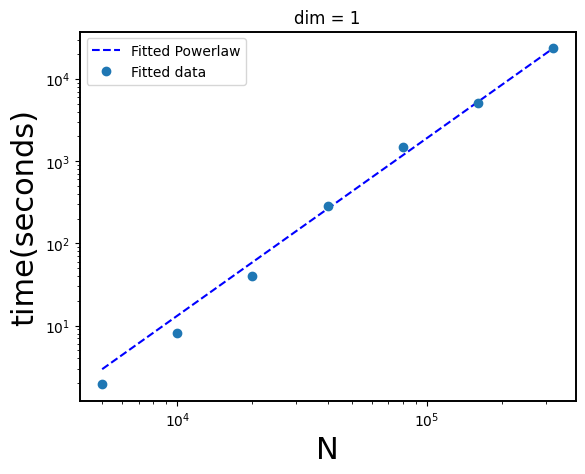

In [3]:
y = complexity_time_1d

# Set parameters for the q-exponential distribution
#q_p = 0.00003
q_init = 1.93/(5000**2)
b_init = 1/2
#b_parameter = kappa(alpha_a, dim)

# q_parameter = 1.3
# b_parameter = 0.415

def time_theoric(x, q, b):
    real_distri = []
    for i in range(len(x)):
        term = b*x[i]**q
        real_distri.append(term)
    
    return real_distri
    

# Create a model using the custom q-exponential function
model = Model(time_theoric)

# Set initial parameter values
params = model.make_params(q=q_init, b=b_init)

# Fit the model to the truncated data
result = model.fit(y, params, x=N)

# Get the fitted parameters
fitted_q_1d = result.params['q'].value
fitted_b_1d = result.params['b'].value

#real_data = exp(N,fitted_q_1d)
# Perform KS test on the fitted q-exponential distribution using the CDF
ks_statistic, ks_p_value = kstest(y, time_theoric(N, fitted_q_1d, fitted_b_1d))

# Display the results
print(result.fit_report())
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
#plt.plot(k_trunc, q_exp(k_trunc, fitted_q_1d, fitted_b_1d), 'b--', label='Fitted q-Exponential')

plt.plot(N, time_theoric(N, fitted_q_1d, fitted_b_1d), 'b--', label='Fitted Powerlaw')
plt.plot(N, y, "o", label='Fitted data')
plt.title("dim = 1")
plt.xlabel("N",fontsize=22)
plt.ylabel("time(seconds)",fontsize=22)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show

[[Model]]
    Model(time_theoric)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 315
    # data points      = 7
    # variables        = 2
    chi-square         = 6926.12637
    reduced chi-square = 1385.22527
    Akaike info crit   = 52.2800207
    Bayesian info crit = 52.1718410
    R-squared          = 0.99998379
[[Variables]]
    q:  2.01657209 +/- 0.00862981 (0.43%) (init = 7.72e-08)
    b:  1.8125e-07 +/- 1.9762e-08 (10.90%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(q, b) = -0.9999
KS Statistic: 0.14285714285714285
P-value: 0.9999609537692629


<function matplotlib.pyplot.show(close=None, block=None)>

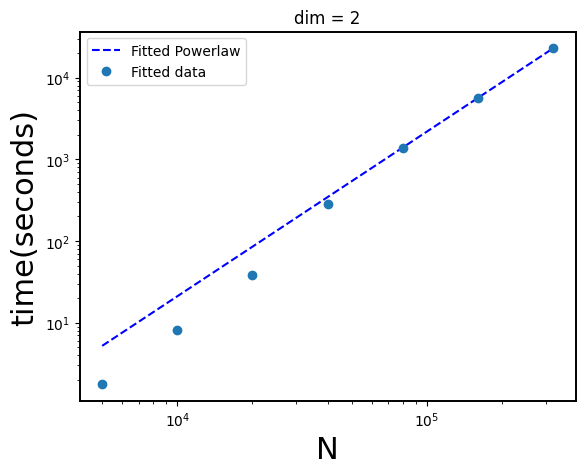

In [4]:
y = complexity_time_2d

# Set parameters for the q-exponential distribution
#q_p = 0.00003
q_init = 1.93/(5000**2)
b_init = 1/2
#b_parameter = kappa(alpha_a, dim)

# q_parameter = 1.3
# b_parameter = 0.415

def time_theoric(x, q, b):
    real_distri = []
    for i in range(len(x)):
        term = b*x[i]**q
        real_distri.append(term)
    
    return real_distri
    

# Create a model using the custom q-exponential function
model = Model(time_theoric)

# Set initial parameter values
params = model.make_params(q=q_init, b=b_init)

# Fit the model to the truncated data
result = model.fit(y, params, x=N)

# Get the fitted parameters
fitted_q_2d = result.params['q'].value
fitted_b_2d = result.params['b'].value

#real_data = exp(N,fitted_q_2d)
# Perform KS test on the fitted q-exponential distribution using the CDF
ks_statistic, ks_p_value = kstest(y, time_theoric(N, fitted_q_2d, fitted_b_2d))

# Display the results
print(result.fit_report())
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
#plt.plot(k_trunc, q_exp(k_trunc, fitted_q_2d, fitted_b_2d), 'b--', label='Fitted q-Exponential')

plt.plot(N, time_theoric(N, fitted_q_2d, fitted_b_2d), 'b--', label='Fitted Powerlaw')
plt.plot(N, y, "o", label='Fitted data')
plt.title("dim = 2")
plt.xlabel("N",fontsize=22)
plt.ylabel("time(seconds)",fontsize=22)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show

[[Model]]
    Model(time_theoric)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 318
    # data points      = 7
    # variables        = 2
    chi-square         = 19696.5843
    reduced chi-square = 3939.31686
    Akaike info crit   = 59.5960326
    Bayesian info crit = 59.4878529
    R-squared          = 0.99995181
[[Variables]]
    q:  2.07462760 +/- 0.01559807 (0.75%) (init = 7.72e-08)
    b:  8.4978e-08 +/- 1.6751e-08 (19.71%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(q, b) = -0.9999
KS Statistic: 0.14285714285714285
P-value: 0.9999609537692629


<function matplotlib.pyplot.show(close=None, block=None)>

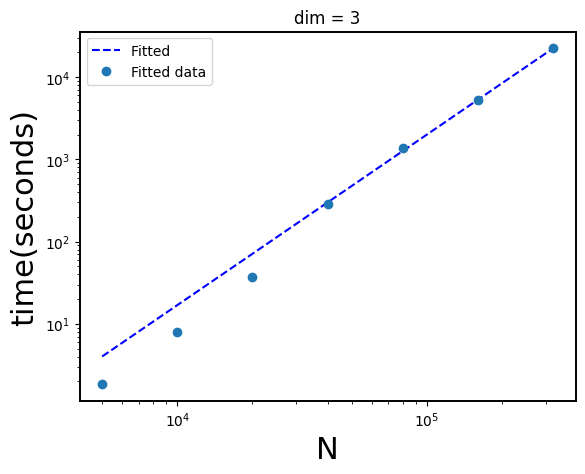

In [5]:
y = complexity_time_3d

# Set parameters for the q-exponential distribution
#q_p = 0.00003
q_init = 1.93/(5000**2)
b_init = 1/2
#b_parameter = kappa(alpha_a, dim)

# q_parameter = 1.3
# b_parameter = 0.415

def time_theoric(x, q, b):
    real_distri = []
    for i in range(len(x)):
        term = b*x[i]**q
        real_distri.append(term)
    
    return real_distri
    

# Create a model using the custom q-exponential function
model = Model(time_theoric)

# Set initial parameter values
params = model.make_params(q=q_init, b=b_init)

# Fit the model to the truncated data
result = model.fit(y, params, x=N)

# Get the fitted parameters
fitted_q_3d = result.params['q'].value
fitted_b_3d = result.params['b'].value

#real_data = exp(N,fitted_q_3d)
# Perform KS test on the fitted q-exponential distribution using the CDF
ks_statistic, ks_p_value = kstest(y, time_theoric(N, fitted_q_3d, fitted_b_3d))

# Display the results
print(result.fit_report())
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
#plt.plot(k_trunc, q_exp(k_trunc, fitted_q_3d, fitted_b_3d), 'b--', label='Fitted q-Exponential')

plt.plot(N, time_theoric(N, fitted_q_3d, fitted_b_3d), 'b--', label='Fitted ')
plt.plot(N, y, "o", label='Fitted data')
plt.title("dim = 3")
plt.xlabel("N",fontsize=22)
plt.ylabel("time(seconds)",fontsize=22)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show

[[Model]]
    Model(time_theoric)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 318
    # data points      = 7
    # variables        = 2
    chi-square         = 19696.5843
    reduced chi-square = 3939.31686
    Akaike info crit   = 59.5960326
    Bayesian info crit = 59.4878529
    R-squared          = 0.99995181
[[Variables]]
    q:  2.07462760 +/- 0.01559807 (0.75%) (init = 7.72e-08)
    b:  8.4978e-08 +/- 1.6751e-08 (19.71%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(q, b) = -0.9999
KS Statistic: 0.14285714285714285
P-value: 0.9999609537692629


<function matplotlib.pyplot.show(close=None, block=None)>

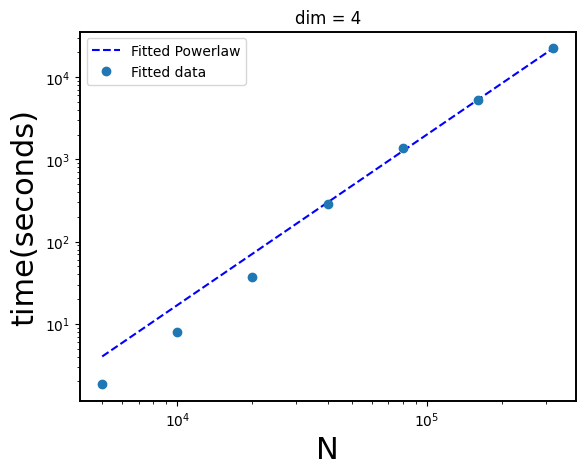

In [6]:
y = complexity_time_3d

# Set parameters for the q-exponential distribution
#q_p = 0.00003
q_init = 1.93/(5000**2)
b_init = 1/2
#b_parameter = kappa(alpha_a, dim)

# q_parameter = 1.3
# b_parameter = 0.415

def time_theoric(x, q, b):
    real_distri = []
    for i in range(len(x)):
        term = b*x[i]**q
        real_distri.append(term)
    
    return real_distri
    

# Create a model using the custom q-exponential function
model = Model(time_theoric)

# Set initial parameter values
params = model.make_params(q=q_init, b=b_init)

# Fit the model to the truncated data
result = model.fit(y, params, x=N)

# Get the fitted parameters
fitted_q_4d = result.params['q'].value
fitted_b_4d = result.params['b'].value

#real_data = exp(N,fitted_q_4d)
# Perform KS test on the fitted q-exponential distribution using the CDF
ks_statistic, ks_p_value = kstest(y, time_theoric(N, fitted_q_4d, fitted_b_4d))

# Display the results
print(result.fit_report())
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
#plt.plot(k_trunc, q_exp(k_trunc, fitted_q_4d, fitted_b_4d), 'b--', label='Fitted q-Exponential')

plt.plot(N, time_theoric(N, fitted_q_4d, fitted_b_4d), 'b--', label='Fitted Powerlaw')
plt.plot(N, y, "o", label='Fitted data')
plt.title("dim = 4")
plt.xlabel("N",fontsize=22)
plt.ylabel("time(seconds)",fontsize=22)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show

In [7]:
def expect_value(N, dim,count_time,just_value):
    if(dim==1):
        a, b = fitted_q_1d, fitted_b_1d
    elif(dim==2):
        a, b = fitted_q_2d, fitted_b_2d
    elif(dim==3):
        a, b = fitted_q_3d, fitted_b_3d
    elif(dim==4):
        a, b = fitted_q_4d, fitted_b_4d
    
    if(count_time == 'seconds'):
        if(just_value==False):
            return print(f"time to {int(N)} nodes is {b*N**a} seconds")
        else:
            return b*N**a
    elif(count_time == 'minutes'):
        if(just_value==False):
            return print(f"time to {int(N)} nodes is {b*N**a/60} minutes")
        else:
            return b*N**a/60
    elif(count_time == 'hours'):
        if(just_value==False):
            return print(f"time to {int(N)} nodes is {b*N**a/3600} hours")
        else:
            return b*N**a/3600
    elif(count_time == 'days'):
        if(just_value==False):
            return print(f"time to {int(N)} nodes is {b*N**a/(24*3600)} days")
        else:
            return b*N**a/(24*3600)
    #return print(f"time to {N} nodes is {b*N**a/60} minutes, {b*N**a/3600} hours, {b*N**a/(24*3600)} days")

In [15]:
time_single_sample = []
number_N = [160000]

type_time = "hours"

for i in range(len(number_N)):
    c_1 = expect_value(N=number_N[i],dim=1,count_time=type_time,just_value=True)
    time_single_sample.append(c_1)
#c_2 = expect_value(N=10**5,dim=1,count_time='days',just_value=True)

In [21]:
alpha_a = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_g = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
dim = [1 ,2, 3, 4]
num_variables = len(alpha_a)*len(alpha_g)*len(dim)
t_s = [num_variables*i for i in time_single_sample]
n_samples = 5
f"N = {number_N[0]}, {(t_s[0]*n_samples)/20} {type_time} to {n_samples} samples" 
#(t_s[1]*25)/20
#num_variables

'N = 160000, 146.09394675301203 hours to 5 samples'

In [14]:
expect_value(N=1.6*10**5,dim=1,count_time='hours',just_value=False)

time to 160000 nodes is 1.4609394675301204 hours


In [11]:
c_1

1.4609394675301204

In [12]:
alpha_a_1 = np.arange(0.1,1,.1)
alpha_a_2 = np.arange(4.5,9.5,1)
alpha_a = np.concatenate((alpha_a_1,alpha_a_2),axis=0)
dim = [1,2,3,4]
N_s = 78
T_t = len(dim)*len(alpha_a)*N_s*c_1
print((T_t/20)/24)

13.294549154524097


The complexity_time to run growth with power law

$O(N^2)$,

specificaly

$t = bN^q$,

where $t$ the time to run code (in seconds), $N$ the size of nodes, with $b$ of the order $10^{-8}$ and $q \approx 2$.